In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/manu/Documents/NLP Study/Imbalance_data_handling/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [10]:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression()
lrm.fit(X_train, y_train)

predicted_value = lrm.predict(X_test)
true_value = y_test

/home/manu/Documents/NLP Study/nlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


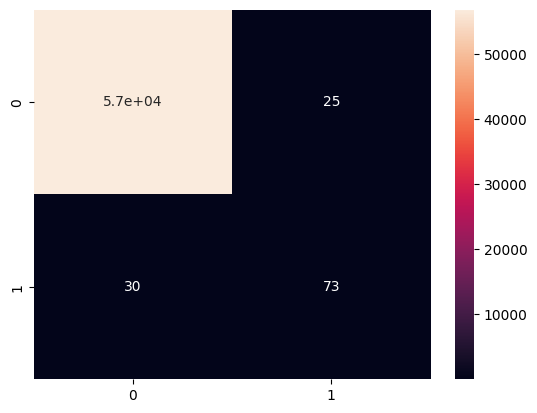

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(true_value, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

In [12]:
print(classification_report(true_value, predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.74      0.71      0.73       103

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
# Assigning weight to the labels

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)

dtc_predicted_value = dtc.predict(X_test)
dtc_true_value = y_test

<Axes: >

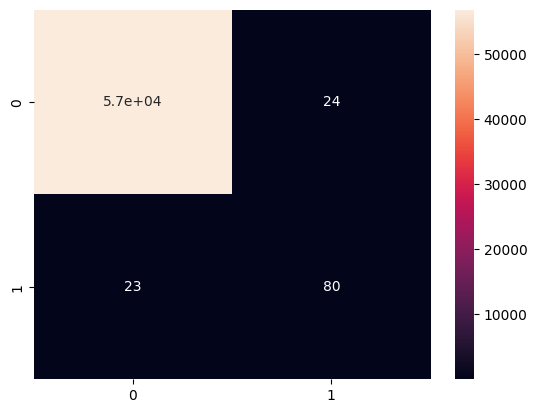

In [17]:
plt.clf()
cm1 = confusion_matrix(dtc_true_value, dtc_predicted_value)
sns.heatmap(cm1, annot=True)

In [18]:
print(classification_report(dtc_true_value, dtc_predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.77      0.78      0.77       103

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced_subsample')

rfc.fit(X_train, y_train)

rfc_predicted_value = rfc.predict(X_test)

<Axes: >

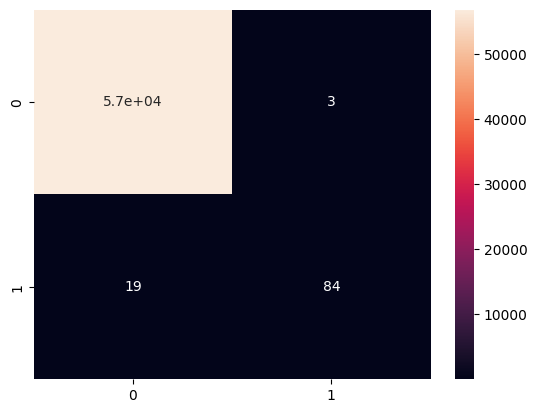

In [20]:
plt.clf()
cm2 = confusion_matrix(y_test, rfc_predicted_value)
sns.heatmap(cm2, annot=True)

In [21]:
print(classification_report(y_test, rfc_predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.97      0.82      0.88       103

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights=)